<a href="https://colab.research.google.com/github/AlcirCastro/Inteligencia-Artificial-2o-Trabalho-Experimento-de-Aprendizado-Nao-Supervisionado/blob/main/K_means_IA_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Basic imports
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
#df is our original DataFrame
df = pd.read_excel("StartUpsESG_0602.xlsx")

In [3]:
X = df.copy()
X.head()

,id,StartUp,Country,Year,ESG,E,S,G,Raised,distr_tk,...,FISCALFRD,FINACIFRD,FOREIGINVEST,FOREIGDP,INTERPAY,percmath,GINI,MAKTEFF,PERCTECH,DEVCOUNT
0,12316,VenusEnergy,Lithuania,2018,0.010,0.008,0.002,0.000,5986183.0,0.27,...,96.7,70,1.299842e+09,2.420713,3.476571,4.26941,35.7,4.642995,3.11263,1
1,23416,GreenEnergyCoin,Netherlands,2018,0.018,0.010,0.006,0.002,0.0,0.00,...,88.2,80,-3.614670e+11,-39.565294,2.264509,6.37706,28.1,5.408080,2.82506,1
2,1553,HydroMiner,Austria,2017,0.014,0.010,0.000,0.004,3500000.0,0.00,...,81.1,70,-2.855524e+10,-6.277635,3.644302,6.07867,30.8,4.897589,4.38647,1
3,17028,PowerCorp,"Hong Kong SAR, China",2018,0.008,0.006,0.000,0.002,0.0,0.00,...,100.0,90,9.703626e+10,26.828457,0.050000,0.00000,0.0,5.705542,0.00000,1
4,8483,Emyron Coin,United States,2018,0.017,0.000,0.011,0.006,0.0,0.28,...,54.8,80,2.614820e+11,1.268600,11.816379,7.20920,41.4,5.209139,3.78213,1


In [4]:
dicio = {}
count = 0

for index, pais in enumerate(df["Country"]):
  if pais in dicio:
    # Se estiver, atribuir o valor correspondente da classe
    X.loc[index, 'Classe_Country'] = dicio[pais]
  else:
    # Se não estiver, atribuir um novo valor de classe e atualizar o dicionário
    dicio[pais] = count
    X.loc[index, 'Classe_Country'] = count
    print("Pais: ",pais," ",count)
    count += 1

Pais:  Lithuania   0
Pais:  Netherlands   1
Pais:  Austria   2
Pais:  Hong Kong SAR, China   3
Pais:  United States   4
Pais:  British Virgin Islands   5
Pais:  Singapore   6
Pais:  Russian Federation   7
Pais:  Philippines   8
Pais:  United Kingdom   9
Pais:  Estonia   10
Pais:  China   11
Pais:  Switzerland   12
Pais:  Belgium   13
Pais:  Cayman Islands   14
Pais:  Latvia   15
Pais:  Portugal   16
Pais:  Bosnia and Herzegovina   17
Pais:  Luxembourg   18
Pais:  Poland   19
Pais:  Canada   20
Pais:  Australia   21
Pais:  Hungary   22
Pais:  Germany   23
Pais:  Finland   24
Pais:  Georgia   25
Pais:  Bulgaria   26
Pais:  Italy   27
Pais:  Norway   28
Pais:  Romania   29
Pais:  Malta   30
Pais:  Ukraine   31
Pais:  Cyprus   32
Pais:  Spain   33
Pais:  Turkey   34
Pais:  Afghanistan   35
Pais:  Indonesia   36
Pais:  Gibraltar   37
Pais:  Tanzania   38
Pais:  France   39
Pais:  Thailand   40
Pais:  Israel   41
Pais:  India   42
Pais:  Jamaica   43
Pais:  Samoa   44
Pais:  Panama   45
Pais

In [5]:
X = X.drop(["StartUp","Country","id","Classe_Country","Year"],axis = 1)
X.head()

,ESG,E,S,G,Raised,distr_tk,Rating,platform ETHEREUM,kyc,whitelist,...,FISCALFRD,FINACIFRD,FOREIGINVEST,FOREIGDP,INTERPAY,percmath,GINI,MAKTEFF,PERCTECH,DEVCOUNT
0,0.010,0.008,0.002,0.000,5986183.0,0.27,3.9,0,0,0,...,96.7,70,1.299842e+09,2.420713,3.476571,4.26941,35.7,4.642995,3.11263,1
1,0.018,0.010,0.006,0.002,0.0,0.00,0.0,1,0,0,...,88.2,80,-3.614670e+11,-39.565294,2.264509,6.37706,28.1,5.408080,2.82506,1
2,0.014,0.010,0.000,0.004,3500000.0,0.00,0.0,1,0,0,...,81.1,70,-2.855524e+10,-6.277635,3.644302,6.07867,30.8,4.897589,4.38647,1
3,0.008,0.006,0.000,0.002,0.0,0.00,0.0,0,0,0,...,100.0,90,9.703626e+10,26.828457,0.050000,0.00000,0.0,5.705542,0.00000,1
4,0.017,0.000,0.011,0.006,0.0,0.28,2.4,1,0,0,...,54.8,80,2.614820e+11,1.268600,11.816379,7.20920,41.4,5.209139,3.78213,1


In [6]:
#Initialize our scaler
scaler = StandardScaler()

In [7]:
#Scale each column in numer
numer = pd.DataFrame(scaler.fit_transform(X))

In [8]:
#Initialize our model
kmeans = KMeans(n_clusters=3)

In [9]:
#Fit our model
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [10]:
#Find which cluster each data-point belongs to
clusters = kmeans.predict(X)

In [11]:
#Add the cluster vector to our DataFrame, X
X["Cluster"] = clusters
df["Cluster"] = clusters

In [12]:
#plotX is a DataFrame containing 5000 values sampled randomly from X
plotX = pd.DataFrame(np.array(X.sample(5000)))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = X.columns

In [13]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [14]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [15]:
nome_das_variaveis = X.columns.tolist()

loadings = pca_1d.components_[0]

# Identificando a variável mais significativa
index_var_mais_significativa = np.argmax(np.abs(loadings))
variavel_mais_significativa = nome_das_variaveis[index_var_mais_significativa]
print(variavel_mais_significativa)

 FOREIGINVEST 


In [16]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [17]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [18]:
plotX["dummy"] = 0

In [19]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]
cluster3 = plotX[plotX["Cluster"] == 3]

In [20]:
#This is needed so we can display plotly plots properly
#init_notebook_mode(connected=True)

In [21]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
trace4 = go.Scatter(
                    x = cluster3["PC1_1d"],
                    y = cluster3["dummy"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(0, 130, 0, 0.8)'),
                    text = None)


data = [trace1, trace2, trace3, trace4]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [22]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)


trace4 = go.Scatter(
                    x = cluster3["PC2_2d"],
                    y = cluster3["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(0, 130, 0, 0.8)'),
                    text = None)





data = [trace1, trace2, trace3,trace4]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [23]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace4 = go.Scatter3d(
                    x = cluster3["PC1_3d"],
                    y = cluster3["PC2_3d"],
                    z = cluster3["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(0, 130, 0, 0.8)'),
                    text = None)








data = [trace1, trace2, trace3,trace4]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

<ipython-input-24-6ddf0265c46e>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




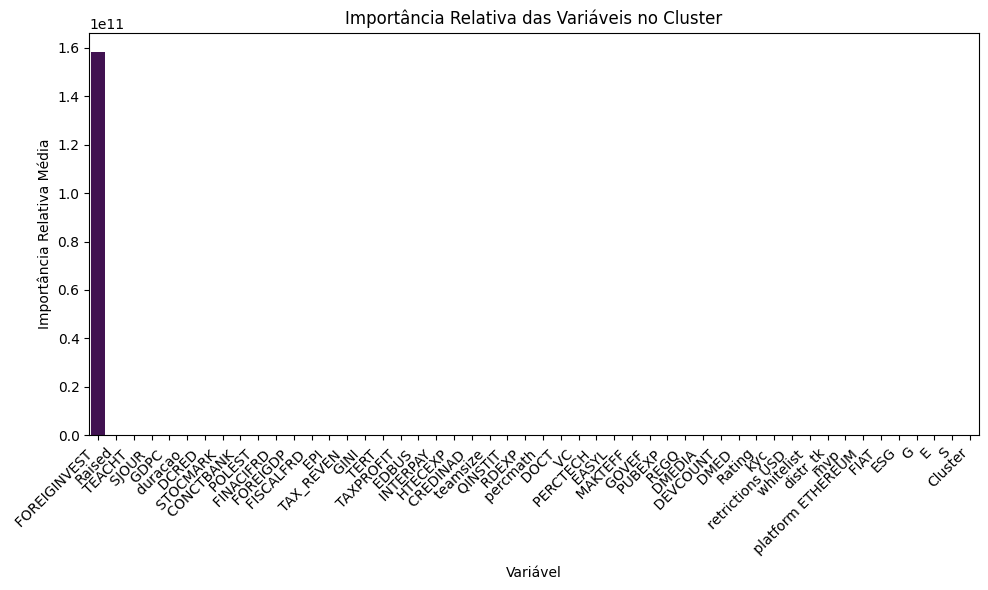

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

Y = X

cluster_means = Y.groupby('Cluster').mean()

# Calcular a importância relativa das variáveis em relação ao cluster (por exemplo, diferença entre a média do cluster e a média global)
cluster_importance = cluster_means.subtract(Y.mean())

# Plotar as importâncias relativas das variáveis
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_importance.abs().mean().sort_values(ascending=False).reset_index(), x='index', y=0, palette='viridis')
plt.title('Importância Relativa das Variáveis no Cluster')
plt.xlabel('Variável')
plt.ylabel('Importância Relativa Média')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 2400x1200 with 0 Axes>

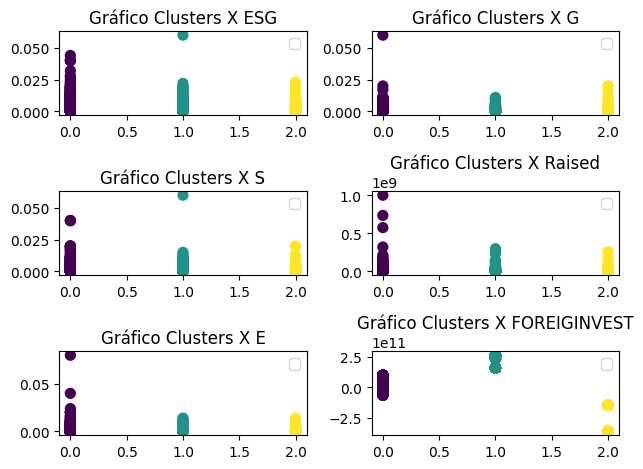

In [25]:
plt.figure(figsize=(24, 12))

fig, axs = plt.subplots(3, 2)

axs[0,0].scatter(df["Cluster"], df["ESG"], c=df["Cluster"], cmap='viridis', s=50)
axs[0,0].set_title('Gráfico Clusters X ESG')
axs[0,0].legend()

axs[1,0].scatter(df["Cluster"], df["S"], c=df["Cluster"], cmap='viridis', s=50)
axs[1,0].set_title('Gráfico Clusters X S')
axs[1,0].legend()

axs[2,0].scatter(df["Cluster"], df["E"], c=df["Cluster"], cmap='viridis', s=50)
axs[2,0].set_title('Gráfico Clusters X E')
axs[2,0].legend()

axs[0,1].scatter(df["Cluster"], df["G"], c=df["Cluster"], cmap='viridis', s=50)
axs[0,1].set_title('Gráfico Clusters X G')
axs[0,1].legend()

axs[1,1].scatter(df["Cluster"], df["Raised"], c=df["Cluster"], cmap='viridis', s=50)
axs[1,1].set_title('Gráfico Clusters X Raised')
axs[1,1].legend()

axs[2,1].scatter(df["Cluster"], df[" FOREIGINVEST "], c=df["Cluster"], cmap='viridis', s=50)
axs[2,1].set_title('Gráfico Clusters X FOREIGINVEST')
axs[2,1].legend()

plt.tight_layout()

plt.show()

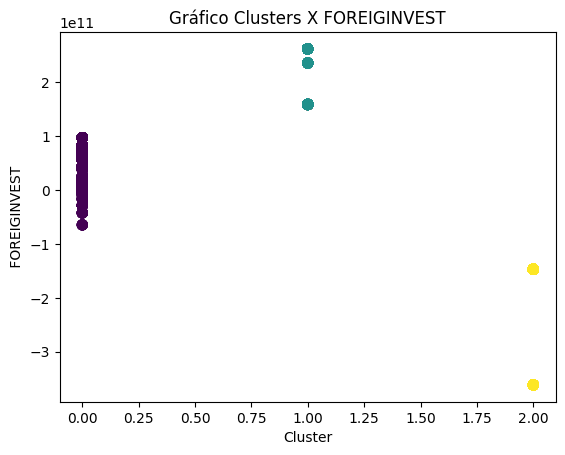

In [26]:
plt.scatter(df["Cluster"], df[" FOREIGINVEST "], c=df["Cluster"], cmap='viridis', s=50)
plt.xlabel('Cluster')
plt.ylabel(' FOREIGINVEST ')
plt.title('Gráfico Clusters X FOREIGINVEST')
plt.show()

<Figure size 2000x1200 with 0 Axes>

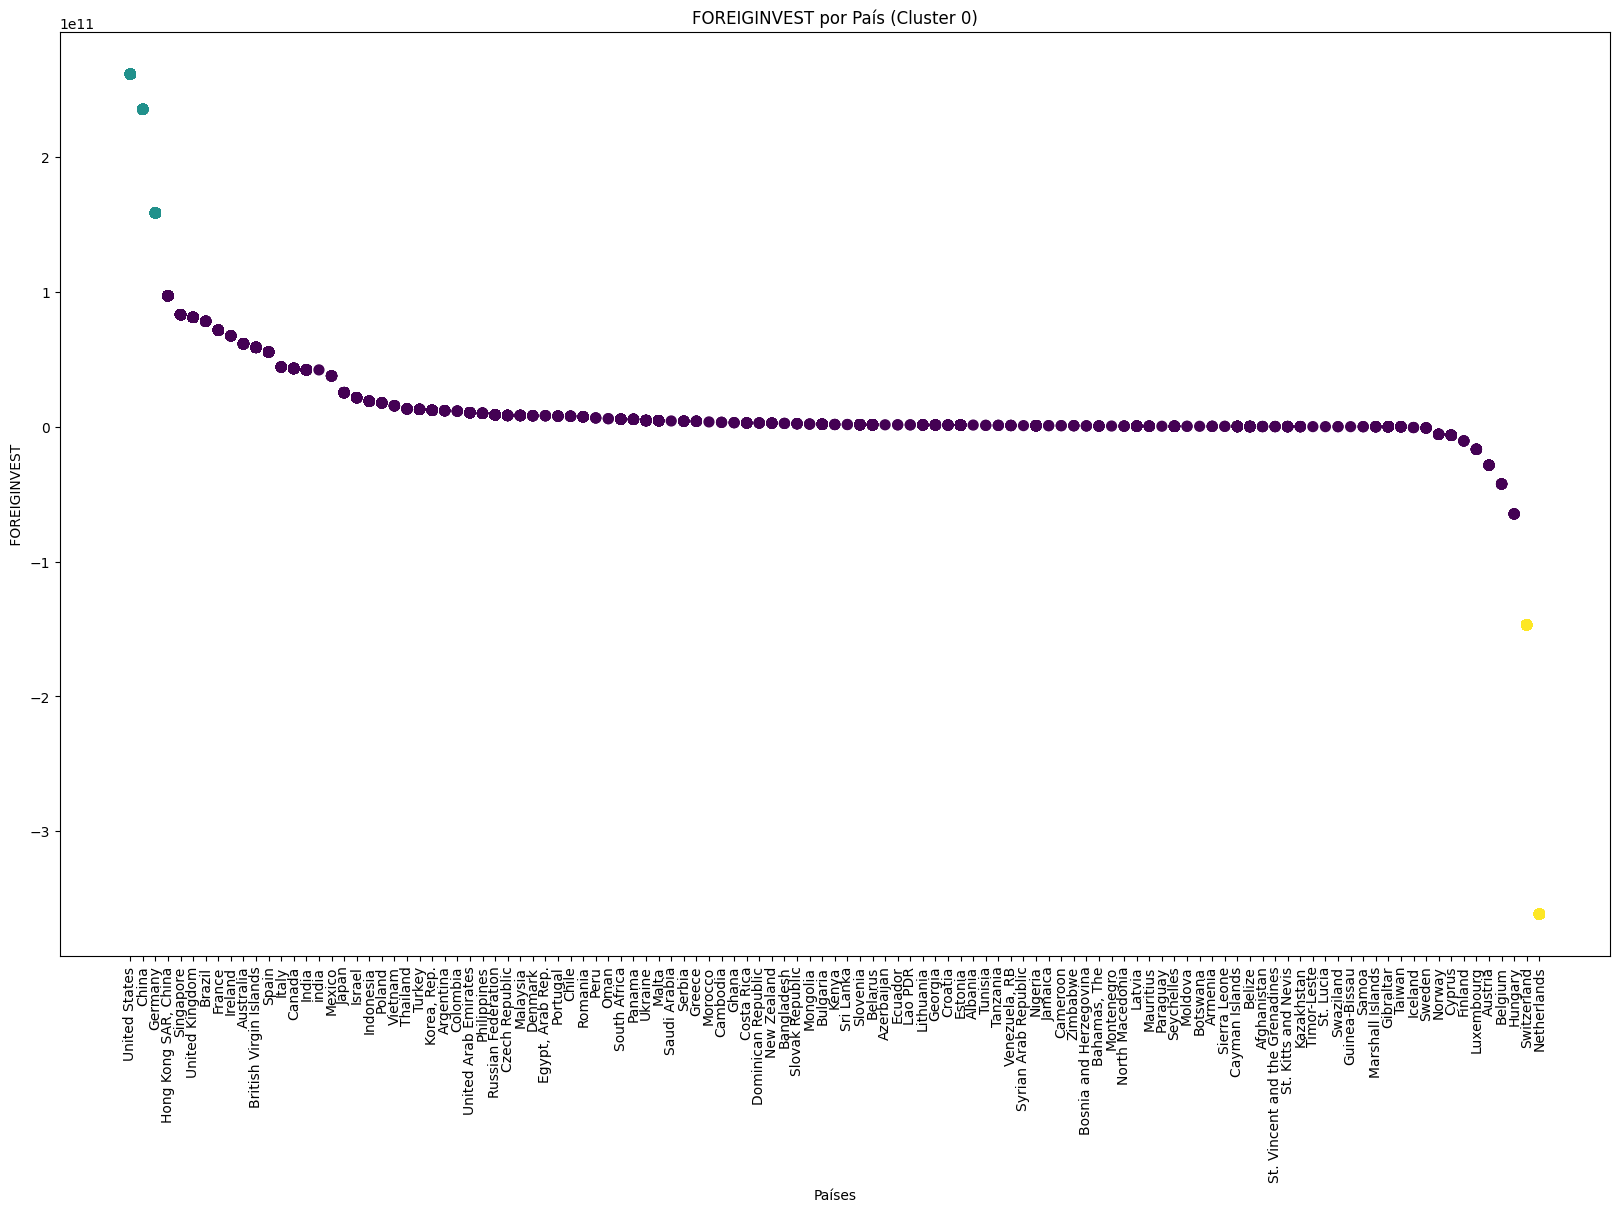

In [27]:
X["Country"] = df["Country"]

cluster0 = X
# Criando o gráfico de barras

# Contando as ocorrências de cada item
plt.figure(figsize=(20,12))
# Criando o gráfico de barras
cluster0_sorted = cluster0.sort_values(by=" FOREIGINVEST ", ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(20,12))
plt.scatter(cluster0_sorted['Country'], cluster0_sorted[" FOREIGINVEST "], c=cluster0_sorted["Cluster"], cmap='viridis', s=50)

# Adicionando rótulos aos eixos
plt.xlabel('Países')
plt.ylabel(" FOREIGINVEST ")
plt.xticks(rotation=90)

# Adicionando título ao gráfico
plt.title('FOREIGINVEST por País (Cluster 0)')

# Exibindo o gráfico
plt.show()

<Figure size 2000x1200 with 0 Axes>

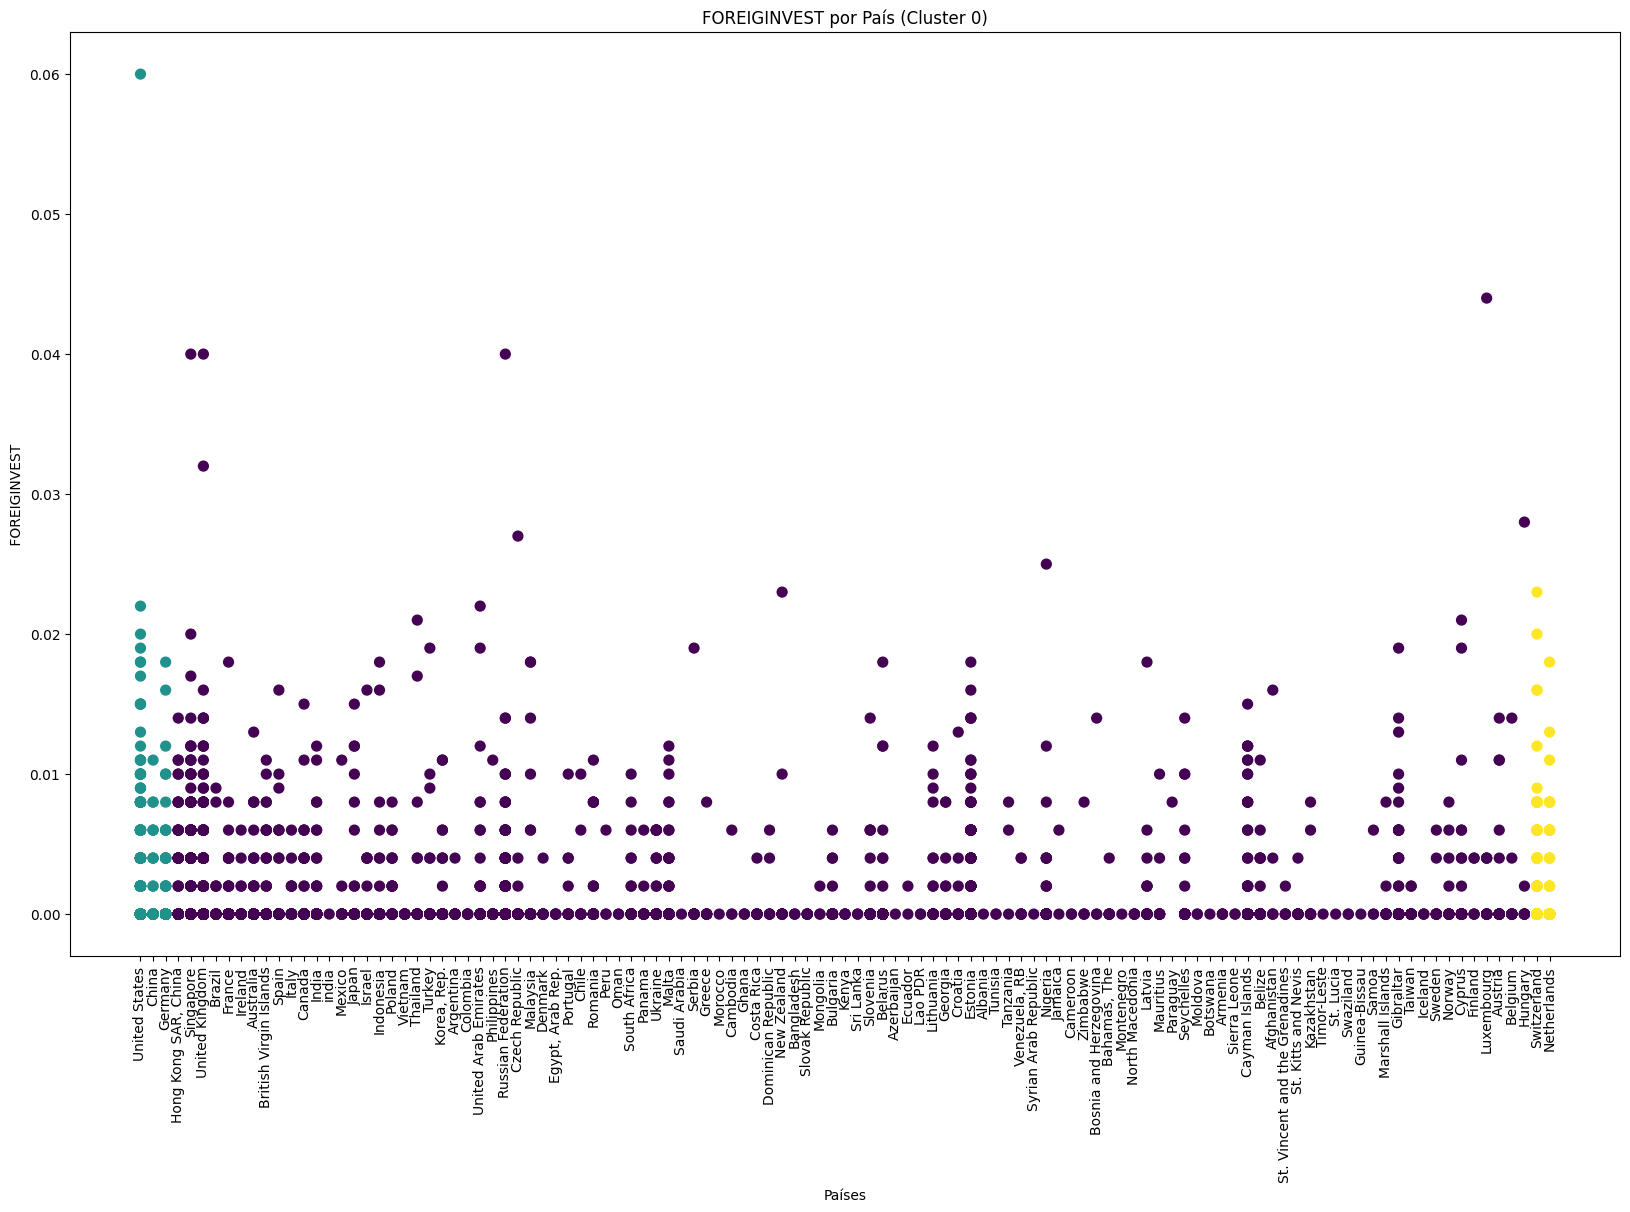

In [28]:
X["Country"] = df["Country"]

cluster0 = X
# Criando o gráfico de barras

# Contando as ocorrências de cada item
plt.figure(figsize=(20,12))
# Criando o gráfico de barras
cluster0_sorted = cluster0.sort_values(by=" FOREIGINVEST ", ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(20,12))
plt.scatter(cluster0_sorted['Country'], cluster0_sorted["ESG"], c=cluster0_sorted["Cluster"], cmap='viridis', s=50)

# Adicionando rótulos aos eixos
plt.xlabel('Países')
plt.ylabel(" FOREIGINVEST ")
plt.xticks(rotation=90)

# Adicionando título ao gráfico
plt.title('FOREIGINVEST por País (Cluster 0)')

# Exibindo o gráfico
plt.show()

<Figure size 2000x1200 with 0 Axes>

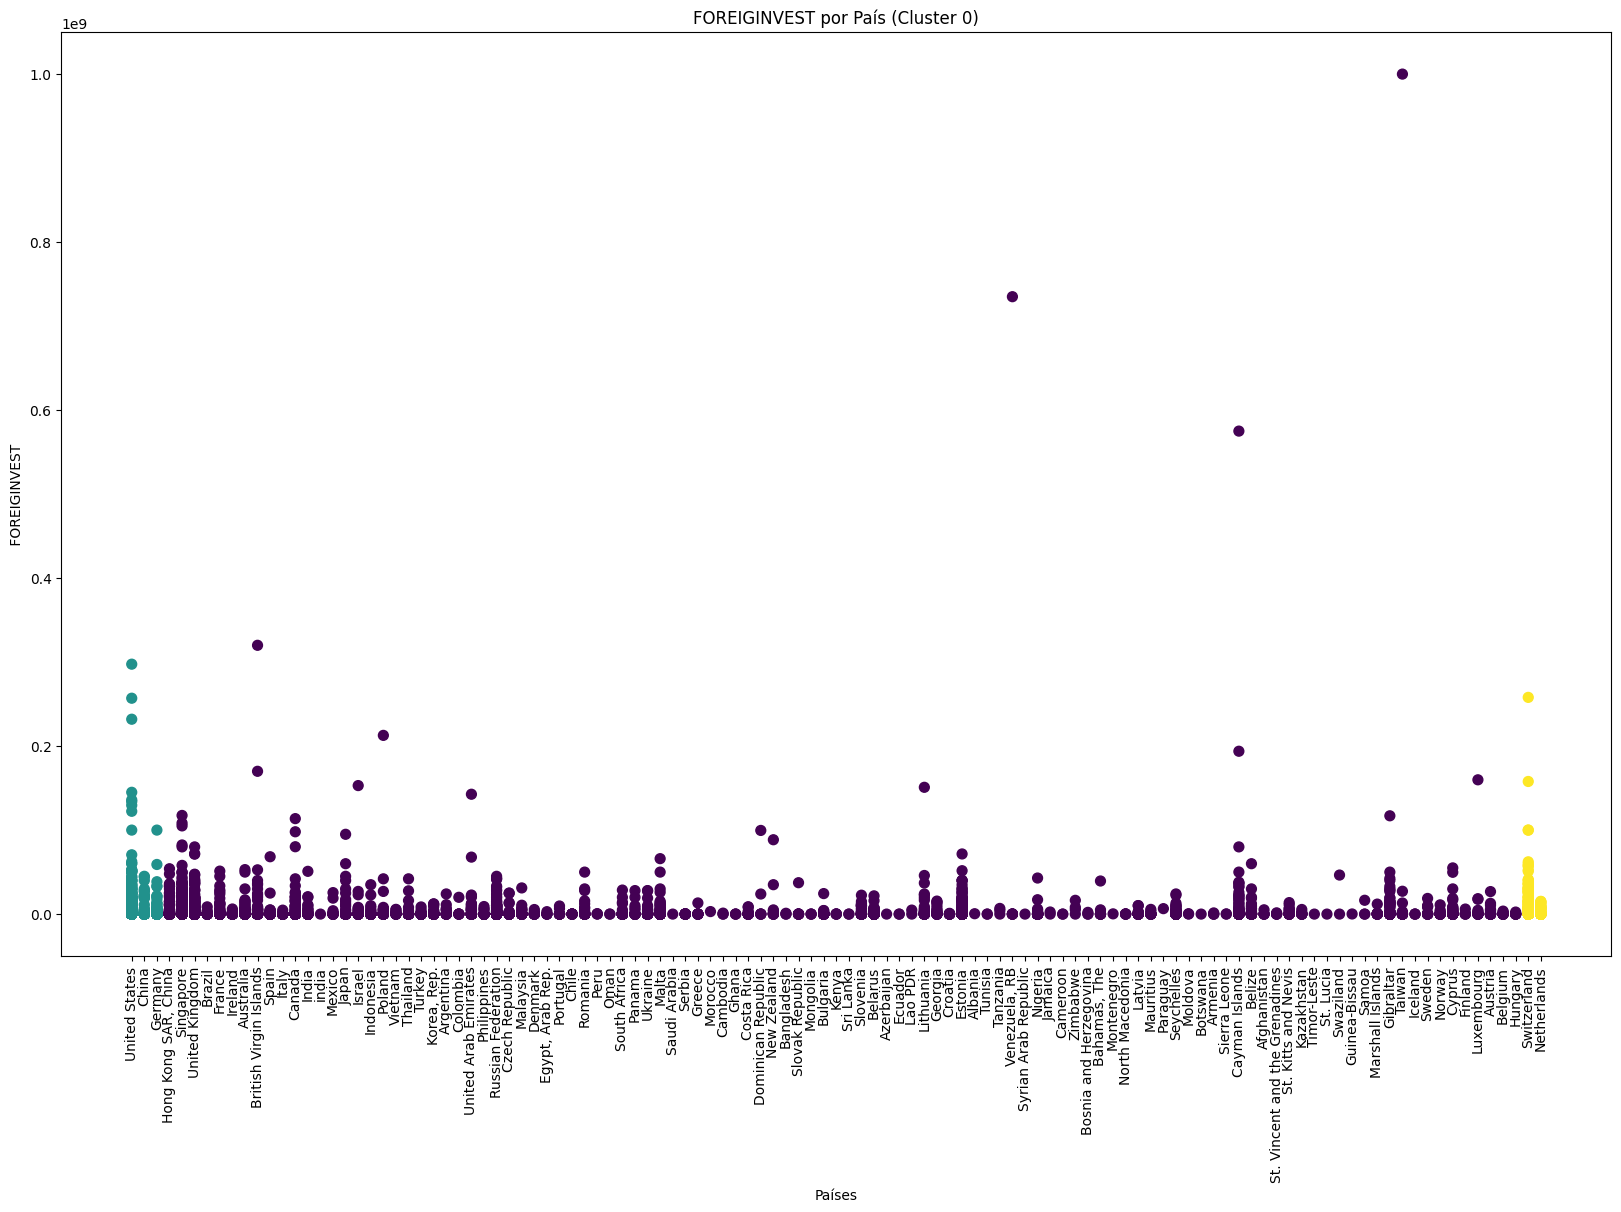

In [29]:
X["Country"] = df["Country"]

cluster0 = X
# Criando o gráfico de barras

# Contando as ocorrências de cada item
plt.figure(figsize=(20,12))
# Criando o gráfico de barras
cluster0_sorted = cluster0.sort_values(by=" FOREIGINVEST ", ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(20,12))
plt.scatter(cluster0_sorted['Country'], cluster0_sorted["Raised"], c=cluster0_sorted["Cluster"], cmap='viridis', s=50)

# Adicionando rótulos aos eixos
plt.xlabel('Países')
plt.ylabel(" FOREIGINVEST ")
plt.xticks(rotation=90)

# Adicionando título ao gráfico
plt.title('FOREIGINVEST por País (Cluster 0)')

# Exibindo o gráfico
plt.show()

<ipython-input-30-44759e9b2106>:12: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<Figure size 2000x1200 with 0 Axes>

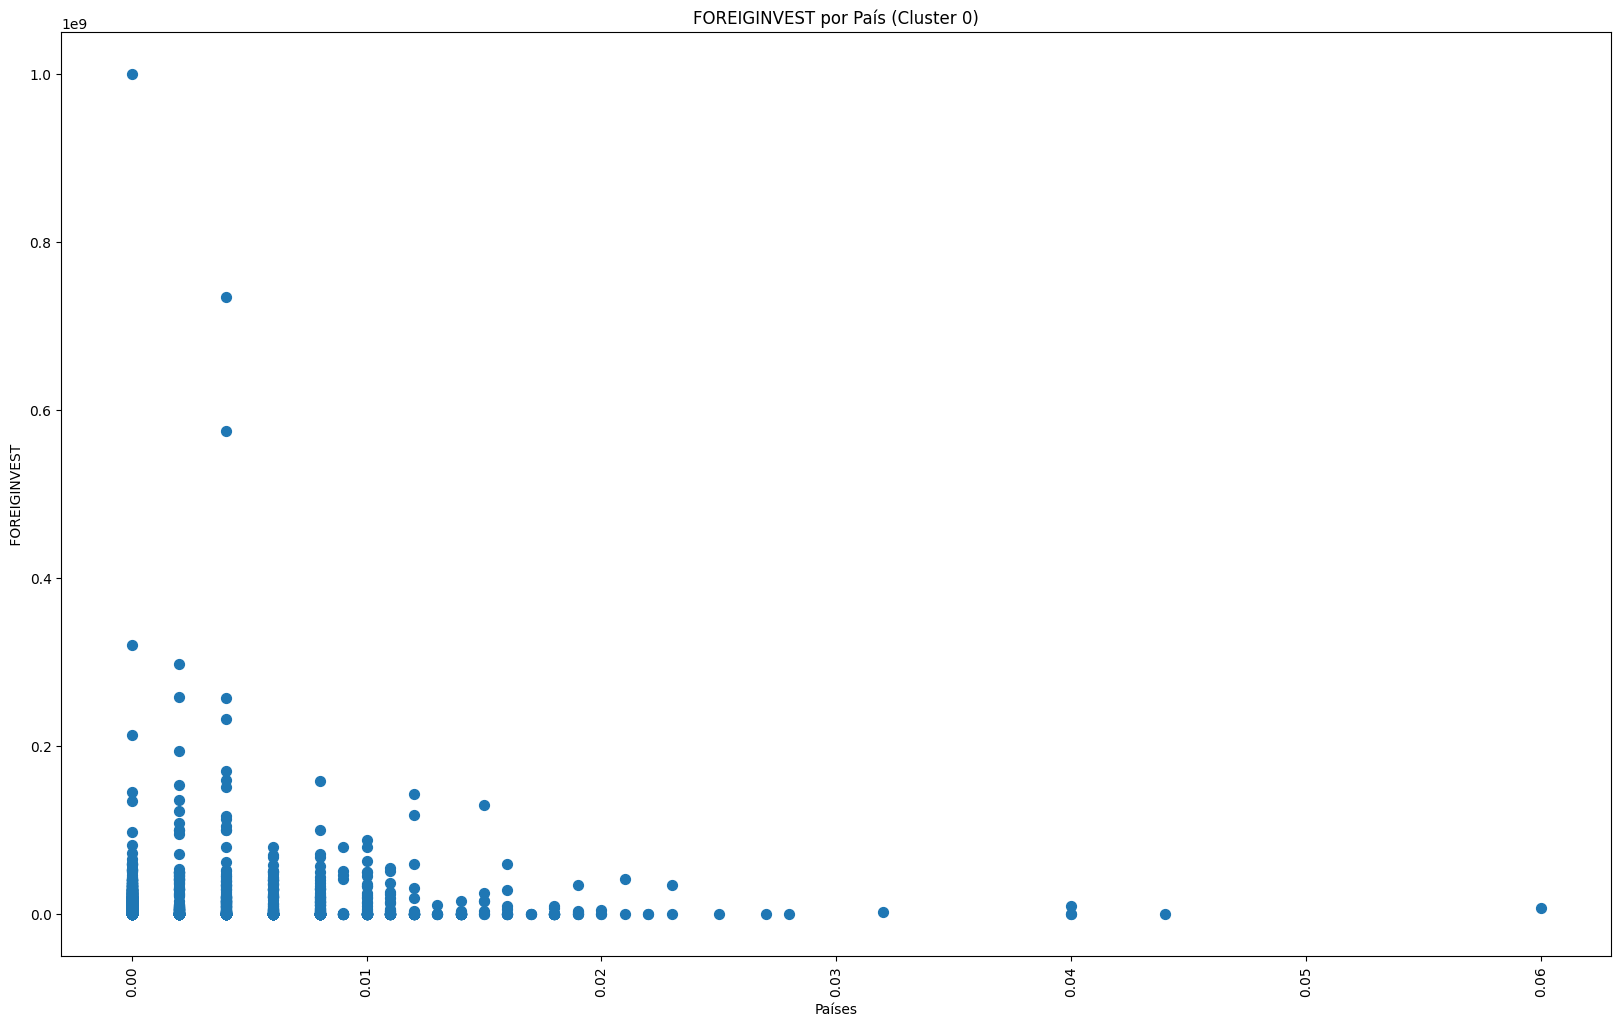

In [30]:
X["Country"] = df["Country"]

cluster0 = X
# Criando o gráfico de barras

# Contando as ocorrências de cada item
plt.figure(figsize=(20,12))
# Criando o gráfico de barras

# Criando o gráfico de barras
plt.figure(figsize=(20,12))
plt.scatter(cluster0['ESG'], cluster0["Raised"], cmap='viridis', s=50)

# Adicionando rótulos aos eixos
plt.xlabel('Países')
plt.ylabel(" FOREIGINVEST ")
plt.xticks(rotation=90)

# Adicionando título ao gráfico
plt.title('FOREIGINVEST por País (Cluster 0)')

# Exibindo o gráfico
plt.show()

In [31]:
cluster0 = df.loc[df["Cluster"] == 0]

cluster0 = cluster0[["ESG", "Raised", "E", "S", "G"]]
cluster0.describe()

,ESG,Raised,E,S,G
count,4943.000000,4.943000e+03,4943.000000,4943.000000,4943.000000
mean,0.000880,3.828429e+06,0.000180,0.000464,0.000302
std,0.002893,2.277649e+07,0.001755,0.001905,0.001381
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,0.000000,1.123448e+06,0.000000,0.000000,0.000000
max,0.044000,1.000000e+09,0.080000,0.040000,0.060000


In [32]:
cluster0 = df.loc[df["Cluster"] == 1]

cluster0 = cluster0[["ESG", "Raised", "E", "S", "G"]]
cluster0.describe()

,ESG,Raised,E,S,G
count,1140.000000,1.140000e+03,1140.000000,1140.000000,1140.000000
mean,0.000882,4.876290e+06,0.000104,0.000491,0.000285
std,0.003167,1.876475e+07,0.000941,0.002381,0.001060
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,0.000000,7.687500e+05,0.000000,0.000000,0.000000
max,0.060000,2.975275e+08,0.014000,0.060000,0.011000


In [33]:
cluster0 = df.loc[df["Cluster"] == 2]

cluster0 = cluster0[["ESG", "Raised", "E", "S", "G"]]
cluster0.describe()

,ESG,Raised,E,S,G
count,458.000000,4.580000e+02,458.00000,458.000000,458.000000
mean,0.001083,4.971154e+06,0.00021,0.000489,0.000461
std,0.002921,1.797535e+07,0.00115,0.001772,0.001658
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.00000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.00000,0.000000,0.000000
75%,0.000000,1.468772e+06,0.00000,0.000000,0.000000
max,0.023000,2.580000e+08,0.01400,0.020000,0.020000
